[back](./03C-association-and-correlation.ipynb)

---
## `Dimensionality Reduction`

A very common issue with **dimensionality** is with having a lot of **dimensions** is called as _curse of dimensionality_

> _curse of dimensionality:_
>
> As a number of features or dimensions grows, the amount of data that we need to generalize accurately grows exponentially

So, if we have more features, meaning we have more columns in our DataFrame then we'll need a lot more rules, data-points to counter this sparsity that you get from the growth of the feature.

That's why we want to do our best to reduce the features and for that, `PCA` - **Principal Component Analysis** is the No.1 technique that people use in data-science to accomplish this, to reduce the number of features.

The implementation of it via the code is easy, but behind the scenes, we can think about `PCA` like it is a **compressor**.

So say, at the start we are having originally about 100 features and we are trying to compress them so that in the end, we get 10 new features. But the 10 new features are made up with some percentage of the _original feature one_, some percentage of the _original feature two_ and some percentage of _original feature three and so forth_.

So, what we will be loosing there is that we will not be able to interpret the features as before, like the previous example, _number of bedrooms_ is a pretty easy to understand what it means as a feature, likely number of bathrooms or squareFootage etc.

But, if we are saying that 20% is coming from bathrooms, 30% from bedrooms, the rest is coming from squareFootage and this is our _new feature number one_ then this is not so easy to understand what that it means. Rather on the flip-side, we can really avoid this _curse of dimensionality_ and really compress our feature space.

### `Initial Setup`

In [1]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns  # Library used to print nicer charts and visualizations
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv(r'../../assets/single_family_home_values.csv')
df.head(4)


,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.76171,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073


In [4]:
# X will be all the columns, without estimated_value
X = df.drop('estimated_value', axis=1)
X = X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage',
       'lotSize', 'yearBuilt', 'priorSaleAmount']]
X.fillna(0, inplace=True)
X.head()


,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0


In [5]:
y = df.estimated_value
y

0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

### `PCA - Principal Component Analysis`

In [6]:
from sklearn.decomposition import PCA


In [7]:
pca = PCA(4)

We are declaring that we need **4 components**. We surely might not know this at the beginning so we might have to do some analysis or use elbow approach to determine where we need to stop and use that value.

Finally, we need to have the new feature set lower than the original feature set. So, sometime we need to do a lot of trial and errors and other times we can look at Elbow plots to see what is the drop in the explained variance by adding a new feature _(increasing the count)_.

So, that where we can customize and decide what number is best.

Now, we have our `X`, our initial feature set, with 15000 rows and 7 columns and we'll take look at how we can use `PCA` to compress our feature set and get the new feature set.

In [8]:
X.shape

(15000, 7)

In [9]:
X_transformed = pca.fit_transform(X) # This will fit and transform

In [10]:
X_transformed.shape

(15000, 4)

We can see that we keep the same number of rows, but we have the columns _(features)_ reduced to 4.

And now we can use a very useful function in `PCA`, **.components_**, will give the components.

In [11]:
pca.components_

array([[ 4.34835866e-07,  1.39033126e-06,  1.76645671e-06,
         9.91884229e-04,  1.22556479e-03,  8.13159056e-06,
         9.99998757e-01],
       [ 4.59899754e-05,  8.88602690e-05,  1.02614970e-04,
         9.51591022e-02,  9.95457158e-01,  2.83604230e-03,
        -1.31440908e-03],
       [-7.41279240e-04, -1.10361769e-03, -1.93477104e-03,
        -9.95458475e-01,  9.51576074e-02,  1.08902953e-03,
         8.70755249e-04],
       [ 2.87494377e-03, -3.44585965e-03,  6.23055904e-03,
        -8.24565322e-04,  2.92725018e-03, -9.99965895e-01,
         5.35419321e-06]])

In [12]:
# The shape of .components
pca.components_.shape

(4, 7)

The shape of **.components_** says 4x7, meaning we have 4 components and each of these components is made up by the original 7 components.

Let's look at the first component, the first new feature that we have after the transformation.

In [13]:
# The first new feature
pca.components_[0]

array([4.34835866e-07, 1.39033126e-06, 1.76645671e-06, 9.91884229e-04,
       1.22556479e-03, 8.13159056e-06, 9.99998757e-01])

We see that this new component has **seven members**, meaning these are the weights that we assigned to the original feature.

That is, 0 element is the weight assigned to the original feature 0 etc

In [14]:
lg = LinearRegression()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y)

In [16]:
lg.fit(X_train, y_train)

LinearRegression()

In [17]:
lg.score(X_test, y_test)

0.7526938605656514

So, comparing to the previous result using the LinearRegression value **0.7580178906271744**, we see that this is almost the same compared to this **transformed feature-set**.

We can say that we actually did not need `PCA` as in fact we only have 7 features and it's really not a lot of features.

But, if in case we were using our original dataset, which had a lot of fields (excluding the prediction variable), then may be `PCA` could have been a better choice.

#### `What is Principal Components Analysis (PCA)?`

`PCA` is a complexity-reduction technique that tries to reduce a set of variables down to a smaller set of components that represent most of the information in the variables.

At a conceptual level, `PCA` works by identifying sets of variables that share variance, and creating a component to represent that variance.

For example, the two images below represent the two different ways of sharing variance across three variables.  In each, overlapping areas represent shared variance.  

<p align="center">
  <img src="../../assets/pca_pic.png" alt="PCA Example">
</p>

A `PCA` of set A would probably result in one component representing the variance shared by all three, discarding the rest of the information in the circles.

A `PCA` of set B, on the other hand, would probably result in two components, one representing the overlapping area shared by magenta and cyan, and one representing the variance in yellow not already included in the magenta/cyan component.  In both cases, some variance is lost.

#### Why `PCA`?

Losing variance in exchange for a smaller set of features can be worthwhile. Some model types (such as regression) assume that features will be uncorrelated with each other, and high levels of inter-feature correlation create unstable solutions.

Solutions with fewer features are easier to understand and are more computationally efficient. Solutions with fewer features are also less vulnerable to over-fitting.

**Curse of dimensionality:**
Working with data becomes more demanding as the number of dimensions increases.

<p align="center">
  <img src="../../assets/curse_of_dimensionality.png" alt="Curse of Dimensionality">
</p>

With n = 1, there are only 5 boxes to search. With n = 2, there are now 25 boxes; and with n = 3, there are 125 boxes to search. As n gets bigger, it becomes difficult to sample all the boxes. This makes the treasure harder to find — especially as many of the boxes are likely to be empty!

In general, with n dimensions each allowing for m states, we will have m^n possible combinations. Try plugging in a few different values and you will be convinced that this presents a workload-versus-sampling challenge to machines tasked with repeatedly sampling different combinations of variables.

With high-dimensional data, we simply cannot comprehensively sample all the possible combinations, leaving vast regions of feature space in the dark.

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  


/Users/goutham/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


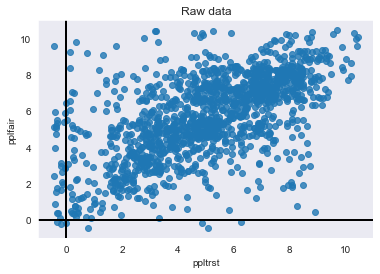

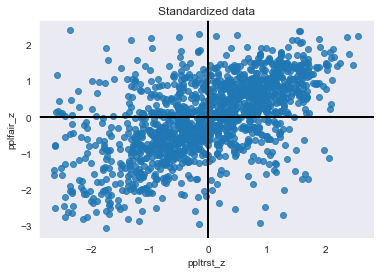

In [18]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("dark")

df = pd.read_csv('../../assets/ESSdata.csv')

print(df.head(2))

# Take a subset of the data for PCA. This limits to Swiss and Czech data from 2012
# and keeps only specific columns.
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['tvtot','ppltrst','pplfair','pplhlp']
].dropna()

t = sns.regplot(
    'ppltrst',
    'pplfair',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

t = sns.regplot(
    'ppltrst_z',
    'pplfair_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()


In the plot above, both axes describe equal variance- they both run from about -3 to 2.5.  If we were to drop one of the axes and describe the data using only the information from the other axis, we would lose roughly 50% of our information. 

However, if we fit a line through the origin that minimizes the distance between the line and each point and then rotate the data, our axes and their information value will change.

<p align="center">
  <img src='../../assets/pca_vector.png' alt="PCA Vector">
<p>


#### `The Math Behind PCA`
The "rotation" pictured above is based on calculating the covariance matrix of the data and applying a linear transformation (rotation) and deriving from that the eigenvalues and eigenvectors that express the amount of variance in the data explained by the new axes.  To explore this further, let's delve into some linear algebra.

#### `Covariance matrix`
A correlation matrix, which we have discussed before, is a covariance matrix where the covariances have been divided by the variances.  This standardizes the covariances so that they are all on the same scale (-1 to 1) and can be compared.  Covariance matrices, like correlation matrices, contain information about the amount of variance shared between pairs of variables.

The variance of x is the sum of the squared differences between each value in x ($x_i$) and the mean of x ($\bar{x}$), divided by the sample size (*n*).

$$var(x)=\frac{\sum(x_i-\bar{x})^2}n$$

(Note that the standard deviation is $\sqrt{var(x)}$)

The covariance between two variables x and y is the product of the differences of each variable value and its mean, divided by the sample size.

$$cov(A)=\sum\frac{(x_i-\bar{x})(y_i-\bar{y})}n$$

Here is the covariance matrix for the ESS data:

In [19]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['tvtot', 'ppltrst', 'pplfair', 'pplhlp']
].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)


Covariance Matrix:
 [[ 1.00071174 -0.24535312 -0.23531159 -0.17820482]
 [-0.24535312  1.00071174  0.60528939  0.49609931]
 [-0.23531159  0.60528939  1.00071174  0.53193085]
 [-0.17820482  0.49609931  0.53193085  1.00071174]]


### `Eigenvectors and Eigenvalues`

#### `Eigenvectors`

- An **Eigenvector** is the directional aspect of a component – it is the red line in the graph earlier.
- During `PCA`, the **eigenvectors** are chosen to be orthogonal, that is, to have a correlation of 0 with one another.
- In fact, this is done sequentially. First, a vector is found that minimizes the distance between that vector and the data-points. This vector is the first component.
- Next, a second vector is found that also minimizes the distance between that vector and the data-points, the catch being that this second vector must be **perpendicular** to the first in one of the n dimensions of the space.
- This procedure continues until there are n vectors.

#### `Eigenvalues`

- **Eigenvalues** represent the length of the Eigenvectors – each eigenvector has an eigenvalue.
- The length of the eigenvector encodes the proportion of total variance explained by a component.
- The total variance is equal to the number of variables in the PCA. Thus, an Eigenvalue of 1 means that the component explains the same amount of variance as one variable.
- An eigenvalue greater than 1 is desirable, since a component with an eigenvalue of 1 adds no value beyond the information contained in any individual variable, and an eigenvalue of less than 1 is actually less efficient at conveying information than a variable by itself.
- An eigenvalue of 2 means that the component contains an amount of information equal to that of two variables. Of course, it doesn’t mean that only two variables load on that component.



In [20]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print('The percentage of total variance in the dataset explained by each component calculated by hand \n',  eig_val_cov / sum(eig_val_cov))


Eigenvector 1: 
[[-0.30084526]
 [ 0.55945823]
 [ 0.5681188 ]
 [ 0.52320135]]
Eigenvalue 1: 2.211256863199823
----------------------------------------
Eigenvector 2: 
[[0.94786152]
 [0.11600843]
 [0.15403897]
 [0.25371751]]
Eigenvalue 2: 0.8847413570711696
----------------------------------------
Eigenvector 3: 
[[ 0.10491426]
 [ 0.51597659]
 [ 0.28505945]
 [-0.80093836]]
Eigenvalue 3: 0.5151421389236897
----------------------------------------
Eigenvector 4: 
[[ 0.00660771]
 [ 0.63821367]
 [-0.75647481]
 [ 0.14277786]]
Eigenvalue 4: 0.3917066158942843
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand 
 [0.55242103 0.22102802 0.12869394 0.097857  ]


### `How many components?`

The biggest decision to make when running a `PCA` is how many components to keep.  PCA will actually give us back as many components as there are variables in the correlation matrix.

If we have n variables and choose to keep n components, we will be able to reproduce 100% of the information in the original data. On the other hand, we wouldn’t have simplified our situation at all – we’ll still be dealing with the same number of separate pieces of information, just expressed as components instead of as variables.

There are a number of rules to guide us in choosing the number of components to keep. The most straightforward is to keep components with eigenvalues greater than 1, as they add value (because they contain more information than a single variable). This rule tends to keep more components than is ideal.

Another rule is to visualize the eigenvalues in order from highest to lowest, connecting them with a line. This is called a "scree" plot because it supposedly resembles the loose rock that accumulates at the foot of a mountain.  Upon visual inspection, the analyst will keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow".  

Many other rules also exist, including variance cutoffs where we only keep components that explain at least x% of the variance in the data, and programmatic ones involving simulating the PCA solution on equivalent randomized data.  Ultimately, the choice of how many components to keep comes down to your reasons for doing PCA.

Let's see how many 

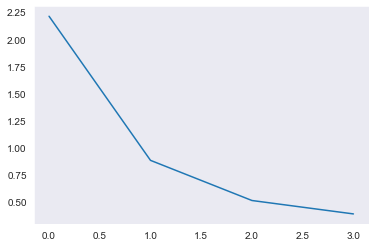

In [21]:
plt.plot(eig_val_cov)
plt.show()


The scree plot and the eigenvalues >1 rule agree that we should keep only the first component. 

### `Conclusion`

`PCA` is a series of linear transformations applied to a data frame to yield a smaller number of columns that explain a large proportion of the total variance contained in the data frame.

---
[next](../05-big-data-with-spark/00-index.ipynb)